In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import matplotlib.pyplot as plt
from utils import *

# determine accuracy

In [2]:
# determine how many samples of each ancestry group
groupscsv = "../datasets/SraRunTableD2.txt"
goldstandard = "../datasets/2_gs.csv"
gs = pd.read_csv(goldstandard)
groups = pd.read_csv(groupscsv)

for group, df_by_group in groups.groupby('Population'):
    accession_numbers = df_by_group['Run'].values.tolist()
    gs_final = gs[gs['Run'].isin(accession_numbers)] #gs_final is a df containing the gold standard samples per population group
    print(len(gs_final))


95
114
111
103
67


In [4]:
data = list()
tools=["optitype","arcas","rna2hla","hlaforest","seq2hla","hlahd","phlat","hlavbseq"]

groupscsv = "../datasets/SraRunTableD2.txt"
groups = pd.read_csv(groupscsv)


for t in tools:
    toolresult = []
    
        
    gs=pd.read_csv("../datasets/2_gs.csv")
    pre=pd.read_csv("../results/standard/"+str(t)+"_d2.csv")

    for group, df_by_group in groups.groupby('Population'):
        accession_numbers = df_by_group['Run'].values.tolist()
        gs_final = gs[gs['Run'].isin(accession_numbers)] #gs_final is a df containing the gold standard samples per population group
        ret = compute_matches(pre,gs_final)
        ret = np.sum(np.array(ret),axis=1)
        #print(ret)
        toolresult.append(ret)


    europe = sum_euro_groups(toolresult[0:4])
    yoruba = toolresult[4]
    data.append([t, europe, yoruba])

    
    
df = pd.DataFrame(data,columns=['tool','europe','yoruba'])
print(df)

        tool             europe          yoruba
0   optitype     [13, 17, 2502]     [0, 8, 390]
1      arcas    [38, 127, 3951]    [6, 67, 561]
2    rna2hla     [69, 87, 3196]   [13, 24, 481]
3  hlaforest    [84, 444, 3476]   [41, 92, 451]
4    seq2hla   [121, 227, 3844]   [27, 37, 584]
5      hlahd    [253, 89, 3864]   [28, 49, 555]
6      phlat   [176, 185, 3221]   [56, 58, 450]
7   hlavbseq  [1859, 134, 2127]  [289, 26, 295]


In [15]:
for tool in data:
    obs = np.array([tool[1], tool[2]])
    res = chi2_contingency(obs)

    print("\ntool: " ,tool[0] , "\ntable: \n", obs, "\n p=" , res[1])



tool:  optitype 
table: 
 [[  13   17 2502]
 [   0    8  390]] 
 p= 0.00960713946909795

tool:  arcas 
table: 
 [[  38  127 3951]
 [   6   67  561]] 
 p= 8.693790874022804e-18

tool:  rna2hla 
table: 
 [[  69   87 3196]
 [  13   24  481]] 
 p= 0.02706540878707981

tool:  hlaforest 
table: 
 [[  84  444 3476]
 [  41   92  451]] 
 p= 8.071046417550053e-14

tool:  seq2hla 
table: 
 [[ 121  227 3844]
 [  27   37  584]] 
 p= 0.1969347693575962

tool:  hlahd 
table: 
 [[ 253   89 3864]
 [  28   49  555]] 
 p= 9.503846597666287e-15

tool:  phlat 
table: 
 [[ 176  185 3221]
 [  56   58  450]] 
 p= 1.9279913208314957e-11

tool:  hlavbseq 
table: 
 [[1859  134 2127]
 [ 289   26  295]] 
 p= 0.19168862822078017


# chi square

# plotting

In [4]:
# calculating accuracy, creating data frames
europe = np.array( df['europe'].values.tolist() )
total = np.sum(europe,axis=1)
europe_4dig = (europe[:,2])/total
europe_2dig = (europe[:,1]+europe[:,2])/total

yoruba = np.array( df['yoruba'].values.tolist() )
total = np.sum(yoruba,axis=1)
yoruba_4dig = (yoruba[:,2])/total
yoruba_2dig = (yoruba[:,1]+yoruba[:,2])/total

# concat to df
dfeuro2dig = pd.DataFrame(europe_2dig,columns=['europe two dig accuracy'])
dfeuro4dig = pd.DataFrame(europe_4dig,columns=['europe four dig accuracy'])
dfyoru2dig = pd.DataFrame(yoruba_2dig,columns=['yoruba two dig accuracy'])
dfyoru4dig = pd.DataFrame(yoruba_4dig,columns=['yoruba four dig accuracy'])

         tool                  ancestry  accuracy
0    optitype  europe four dig accuracy  0.212875
1       arcas  europe four dig accuracy  0.203596
2     rna2hla  europe four dig accuracy  0.207339
3   hlaforest  europe four dig accuracy  0.189061
4     seq2hla  europe four dig accuracy  0.199427
5       hlahd  europe four dig accuracy  0.192107
6       phlat  europe four dig accuracy  0.201005
7    hlavbseq  europe four dig accuracy  0.112379
8    optitype  yoruba four dig accuracy  0.979899
9       arcas  yoruba four dig accuracy  0.884858
10    rna2hla  yoruba four dig accuracy  0.928571
11  hlaforest  yoruba four dig accuracy  0.772260
12    seq2hla  yoruba four dig accuracy  0.901235
13      hlahd  yoruba four dig accuracy  0.878165
14      phlat  yoruba four dig accuracy  0.797872
15   hlavbseq  yoruba four dig accuracy  0.483607


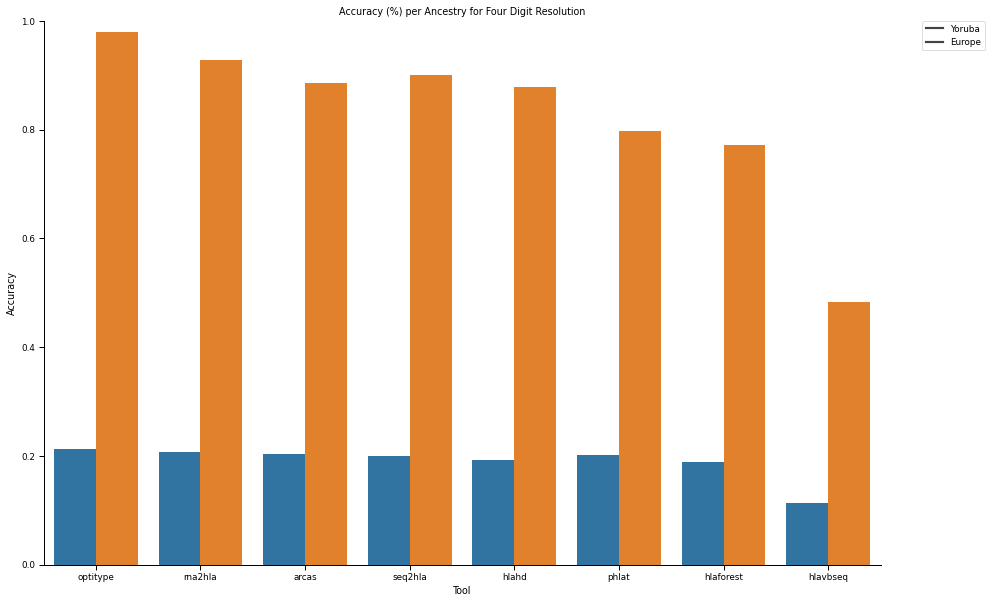

In [5]:
# 4 dig accuracy


df_accuracy=pd.concat([df['tool'],dfeuro4dig,dfyoru4dig],axis=1, join='inner')

df_accuracy = pd.melt(df_accuracy, id_vars="tool", var_name="ancestry", value_name="accuracy")
print(df_accuracy)

tool_names=['OptiType','ArcasHLA','RNA2HLA','HLAForest','Seq2HLA','HLA-HD','PHLAT','HLA-VBseq']
order =["optitype","rna2hla","arcas","seq2hla","hlahd","phlat","hlaforest","hlavbseq"]

sns.set_context("paper")
sns.color_palette("pastel")
plt.figure(figsize=(15,10))
ax=sns.barplot(x = 'tool', y = 'accuracy', data=df_accuracy,hue='ancestry',order=order)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Tool")
ax.set_title("Accuracy (%) per Ancestry for Four Digit Resolution") 
plt.legend(labels=['Yoruba','Europe'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,1))
sns.despine()
#plt.savefig('../Figures/read_length_accuracy_4dig.png',bbox_inches ="tight",dpi=300)

         tool                 ancestry  accuracy
0    optitype  europe two dig accuracy  0.218009
1       arcas  europe two dig accuracy  0.217201
2     rna2hla  europe two dig accuracy  0.216587
3   hlaforest  europe two dig accuracy  0.220779
4     seq2hla  europe two dig accuracy  0.215887
5       hlahd  europe two dig accuracy  0.202330
6       phlat  europe two dig accuracy  0.217755
7    hlavbseq  europe two dig accuracy  0.124029
8    optitype  yoruba two dig accuracy  1.000000
9       arcas  yoruba two dig accuracy  0.990536
10    rna2hla  yoruba two dig accuracy  0.974903
11  hlaforest  yoruba two dig accuracy  0.929795
12    seq2hla  yoruba two dig accuracy  0.958333
13      hlahd  yoruba two dig accuracy  0.955696
14      phlat  yoruba two dig accuracy  0.900709
15   hlavbseq  yoruba two dig accuracy  0.526230


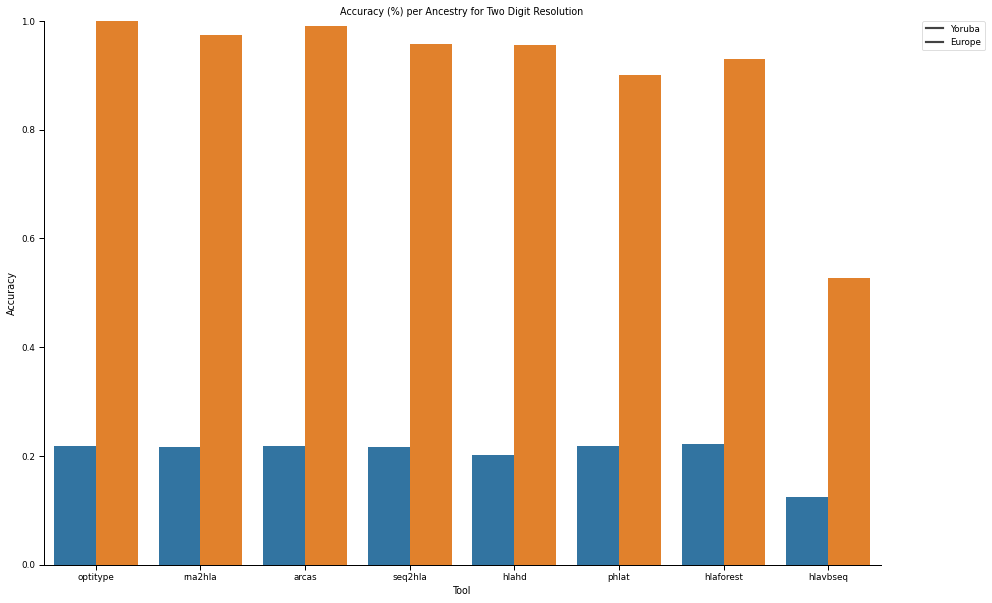

In [6]:
# 2 dig accuracy plot
df_accuracy=pd.concat([df['tool'],dfeuro2dig,dfyoru2dig],axis=1, join='inner')
df_accuracy = pd.melt(df_accuracy, id_vars="tool", var_name="ancestry", value_name="accuracy")
print(df_accuracy)

tool_names=['OptiType','ArcasHLA','RNA2HLA','HLAForest','Seq2HLA','HLA-HD','PHLAT','HLA-VBseq']
order =["optitype","rna2hla","arcas","seq2hla","hlahd","phlat","hlaforest","hlavbseq"]

sns.set_context("paper")
sns.color_palette("pastel")
plt.figure(figsize=(15,10))
ax=sns.barplot(x = 'tool', y = 'accuracy', data=df_accuracy,hue='ancestry',order=order)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Tool")
ax.set_title("Accuracy (%) per Ancestry for Two Digit Resolution") 
plt.legend(labels=['Yoruba','Europe'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,1))
sns.despine()
#plt.savefig('../Figures/read_length_accuracy_4dig.png',bbox_inches ="tight",dpi=300)

In [ ]:
# getting 